## Data Exploration - Data Mining Cup 2022

In [7]:
## Importing all  libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_wrangling import cleaning_category, appending_parent_category, removing_NAN_col
pd.set_option('display.max_columns', 100)

In [8]:
## Reading all data sets:

items = pd.read_csv('items.csv', sep = '|')
orders = pd.read_csv('orders.csv', sep = '|')
category = pd.read_csv('category_hierarchy.csv', sep = '|')
submission = pd.read_csv('submission.csv', sep = '|')

#### Items:

In [9]:
items.head()

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


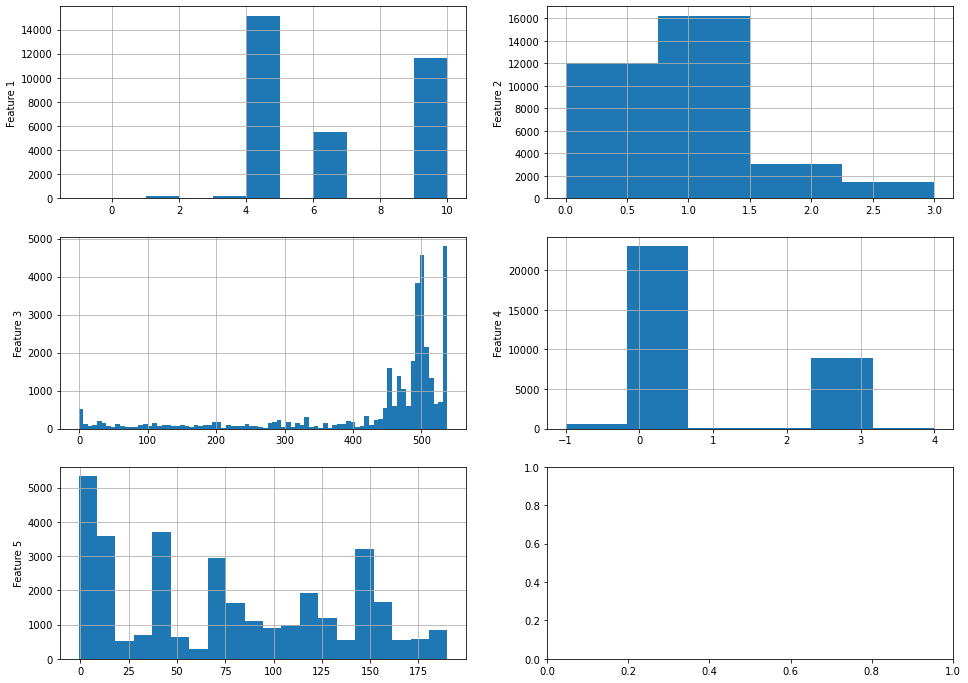

In [26]:
## Visualizing item features:

## Creating a new figure
fig, axes = plt.subplots(3, 2, figsize = (16, 12))

axes[0, 0].hist([items['feature_1']], bins = 11)
axes[0, 0].set_ylabel('Feature 1')
axes[0, 0].grid()

axes[0, 1].hist([items['feature_2']], bins = 4)
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].grid()

axes[1, 0].hist([items['feature_3']], bins = 80)
axes[1, 0].set_ylabel('Feature 3')
axes[1, 0].grid()

axes[1, 1].hist([items['feature_4']], bins = 6)
axes[1, 1].set_ylabel('Feature 4')
axes[1, 1].grid()

axes[2, 0].hist([items['feature_5']], bins = 20)
axes[2, 0].set_ylabel('Feature 5')
axes[2, 0].grid()

In [28]:
items['categories'].head(20)

0                               [2890, 855, 3908, 3909]
1                                                   NaN
2     [3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...
3                                                [3270]
4                                                [2470]
5                                                   NaN
6                                      [236, 3625, 356]
7                                          [2658, 1686]
8                                     [390, 2678, 1708]
9                                           [390, 1708]
10           [3222, 1170, 2296, 3751, 3399, 1772, 3917]
11                        [3259, 2144, 2984, 677, 3349]
12                                               [2942]
13                                               [2942]
14                                         [1091, 2325]
15                                    [474, 1330, 3471]
16                                                  NaN
17                                              

#### Orders:

In [10]:
orders.head()

,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


In [11]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [12]:
orders['order'].value_counts()

1      846264
2      143601
3       40444
4       17534
5       12579
6        4138
10       2438
8        1793
7         895
20        492
12        286
15        285
30        127
50         90
9          89
25         87
11         75
100        52
40         48
16         43
14         34
13         27
24         14
18         12
21         12
22         11
60          9
17          8
35          8
26          6
19          4
80          4
31          4
23          3
28          3
70          3
32          2
65          1
93          1
90          1
85          1
75          1
51          1
63          1
43          1
49          1
29          1
48          1
27          1
98          1
34          1
Name: order, dtype: int64

#### Category:

In [32]:
category.head(20)

,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623
5,5,2478
6,6,1582
7,7,3027
8,8,2364
9,9,3590


#### Submission:

In [33]:
submission.head()

,userID,itemID,prediction
0,0,20664,NaN
1,0,28231,NaN
2,13,2690,NaN
3,15,1299,NaN
4,15,20968,NaN
